In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
#Carregando Dataset
df = pd.read_csv('alternativas-real.csv',engine='python', sep=',')

#Analisando Shape da Matriz
#df.shape

#Lendo 5 primeiras linhas of the dataframe.
df.head()

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Question12,Content
0,52,53,60,62,65,70,73,79,82,86,89,93,5
1,50,53,60,62,68,70,73,77,83,87,91,94,5
2,51,53,60,64,68,71,76,80,84,88,90,95,6
3,51,53,60,64,68,71,73,80,84,85,89,95,6
4,49,54,60,63,66,69,76,79,84,86,90,96,4


In [3]:
#Separando "Features" e Variável "Target"
X = df.drop('Content',axis=1).values
y = df['Content'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

Melhor K: 3 - Acurácia: 70.95


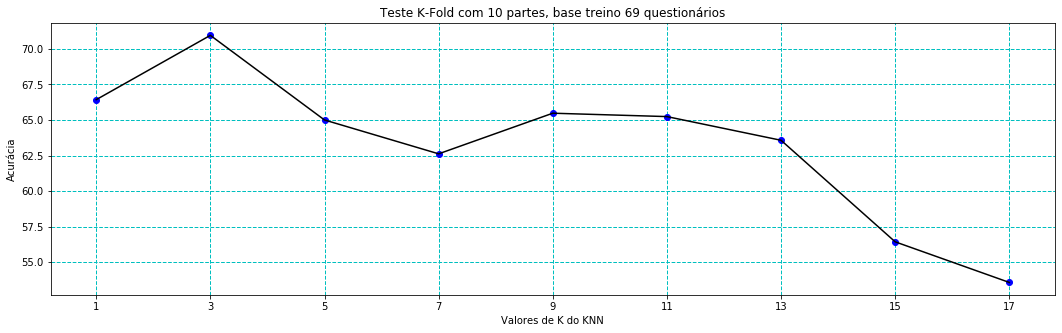

In [4]:
#K-FOLD
from sklearn.model_selection import cross_val_score

#Cria o classificador e passa o k
CONST_K = 17
knn = KNeighborsClassifier(n_neighbors = 1, metric='euclidean')
knn.n_neighbors = 1
x_ks_utilizado = []
y_acurracias = []
test_accuracy_max = 0
best_k = 0

while True:
    #Validação Cruzada K-Fold com 10 partes  
    acur = cross_val_score(knn, X, y, cv = 10, scoring='accuracy').mean()
    y_acurracias.append(acur * 100)
    x_ks_utilizado.append(knn.n_neighbors)
         
    if knn.n_neighbors < CONST_K:
        if np.amax(y_acurracias) > test_accuracy_max:
            best_k = knn.n_neighbors
            test_accuracy_max = np.amax(y_acurracias)
            
        knn.n_neighbors += 2
    else:
        break       

print(f"Melhor K: {best_k} - Acurácia: {round(test_accuracy_max, 2)}")
        
plt.figure( figsize=(18, 5)) #Tamanho figura
plt.title(f"Teste K-Fold com 10 partes, base treino {len(X)} questionários")
plt.grid(color='c', linestyle='--', linewidth=1)
plt.xlabel("Valores de K do KNN")
plt.xticks(range(1, 102, 2))
plt.ylabel("Acurácia")
#plt.yticks(range(50, 100, 10))
plt.plot(x_ks_utilizado, y_acurracias, 'bo')
plt.plot(x_ks_utilizado, y_acurracias, 'k-', color='black')
plt.show()

Melhor K: 3 - Acurácia: 69.57


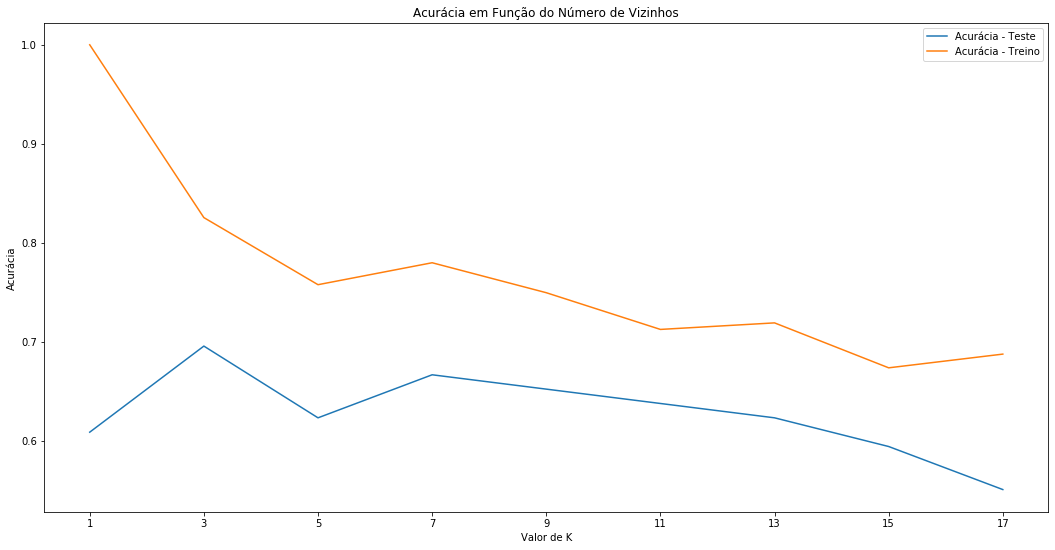

In [5]:
#Leave One Out (LOO)
from sklearn.model_selection import LeaveOneOut

neighbors = range(1,18,2)
train_accuracy_mean = []
test_accuracy_mean = []
test_accuracy_max = 0
best_k = 0

for i in neighbors:
    train_accuracy =np.empty(len(X))
    test_accuracy = np.empty(len(X))

    loo = LeaveOneOut()
    for train, test in loo.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)

        #Calculando acurácia para conjunto de treinamento
        train_accuracy[test] = knn.score(X_train, y_train)  
        
        #Calculando acurácia para conjunto de teste
        test_accuracy[test] = knn.score(X_test, y_test)

    train_accuracy_mean.append(train_accuracy.mean())
    test_accuracy_mean.append(test_accuracy.mean())
    
    if np.amax(test_accuracy_mean) > test_accuracy_max:
        best_k = i
        test_accuracy_max = test_accuracy.mean()

train_accuracy_mean = np.array(train_accuracy_mean)
test_accuracy_mean = np.array(test_accuracy_mean)

print(f"Melhor K: {best_k} - Acurácia: {round(test_accuracy_max * 100, 2)}")

#Generate plot
plt.figure(figsize=(18, 9)) #Tamanho figura
plt.title('Acurácia em Função do Número de Vizinhos')
plt.xlabel('Valor de K')
plt.xticks(range(1, 18, 2))
plt.ylabel('Acurácia')
plt.plot(neighbors, test_accuracy_mean, label='Acurácia - Teste')
plt.plot(neighbors, train_accuracy_mean, label='Acurácia - Treino')
plt.legend()
plt.show()